In [11]:
# Visualize the trend in triad balance of the network over previous 10 years
# Heron Ziegel
# 915986142

import numpy as np
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import math
import glob

In [12]:
import ipynb.fs.full.utility_functions as util
import ipynb.fs.full.visualize_graph as vis

In [13]:
# UPDATE THESE VARIABLES TO CHANGE THE DATA & APPEARANCE

# Path where the data is stored
DATA_FILEPATH = '../Data/Timeline/'

# integer 1-6, changes how the graph visuals appear
SEED = 6

In [44]:
# Fill the array with graphs based on each CSV file in the folder (one CSV file = one year's network data)
timeline_graphs = []

# Iterate over all CSV files in folder, create a new graph and append it to timeline_graphs
for file_name in glob.glob(DATA_FILEPATH+'*.csv'):
    df = pd.read_csv(file_name, index_col=0)
    input_data = df.to_numpy()
    column_names = df.columns
    G = util.newGraph(input_data, column_names)
    timeline_graphs.append(G)

print(timeline_graphs)

In [47]:
# Create a new array of all the graphs and their structural balance
balance_array = np.zeros(shape=(len(timeline_graphs), 2))

for i in range(len(timeline_graphs)):
    balance_array[i][0] = i + 1
    balance_array[i][1] = util.structural_balance(timeline_graphs[i])

print(balance_array)

[[1.         0.15151515]]


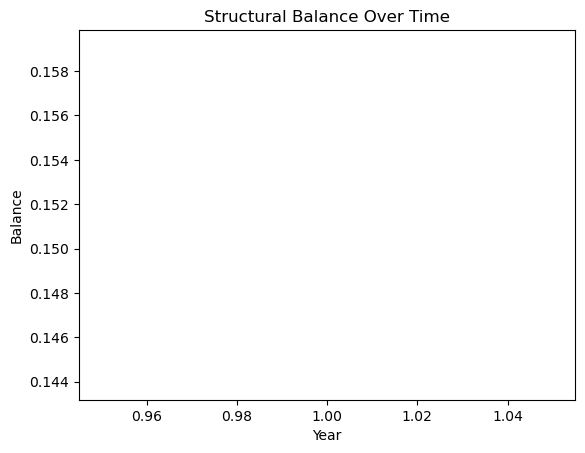

In [49]:
# Visualize the structural balance as a line graph

plt.plot(balance_array[:, 0], balance_array[:, 1])
plt.xlabel("Year")
plt.ylabel("Balance")
plt.title("Structural Balance Over Time")
plt.show()